## Informações

Esse exemplo foi extraído de http://deeplearningbook.com.br/

## Dados

Esse exemplo tem como objetivo treinar uma rede para classificar gatos e cachorros, a partir de fotos reais.
O conjunto de dados é gratuito, disponível em https://www.kaggle.com/c/dogs-vs-cats/data

## Carregando os Dados

O primeiro passo é certificar-se que temos acesso ao conjunto de dados. Para isso faremos alguns testes, mostrando algumas imagens de gatos e cachorros do repositório de imagens que será utilizado para treinamento.

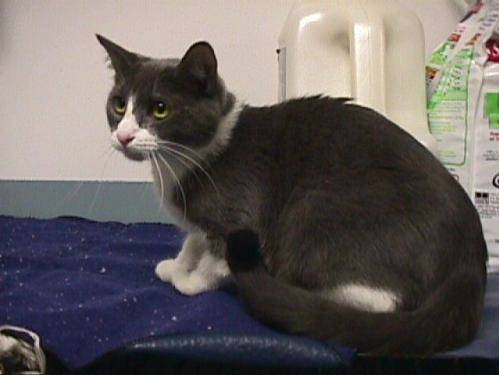

In [1]:
from IPython.display import Image
Image(filename = 'dataset_treino/cats/cat.4.jpg')

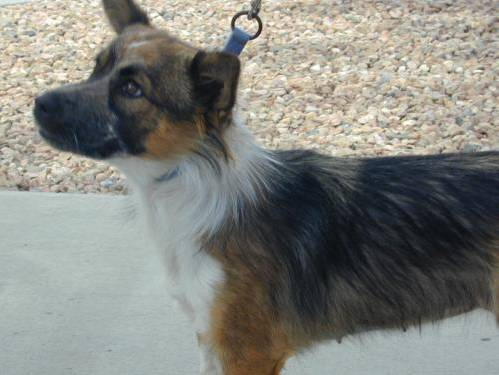

In [2]:
Image(filename='dataset_treino/dogs/dog.3.jpg')

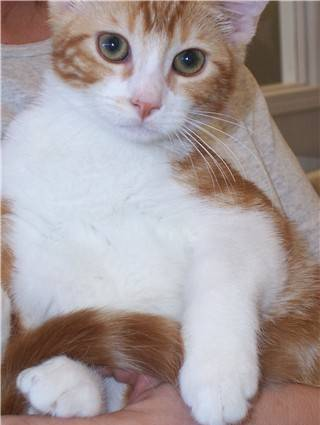

In [3]:
Image(filename='dataset_treino/cats/cat.9.jpg')

## Inicializando o Tensor Flow

Já temos o nosso conjunto de addos, agora precisamos apenas utilizar o TensorFlow e escolher a estrutura adequada. Primeiramente, nos certificamos de que o TensorFlow está instalado, como também o Keras, nossa API de Deep Learning:

In [4]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.3.1


In [5]:
import tensorflow.keras as K
print("Versão do Keras:", K.__version__)

Versão do Keras: 2.4.0


Vamos agora importar as bibliotecas do Keras para as camadas de redes convolutivas. Não precisamos implementar essas camadas, elas já estão prontas, apenas instanciamos e passamos os parametros.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

Podemos então inicializar nossa rede, vamos chama-la de classifier:

In [7]:
# Inicializando a Rede Neural
classifier = Sequential()

Nossa primeira camada será uma camada de convolução. Ela irá usar 32 features e filtros 3x3. Nossas imagens serão convertidas em arrays 64x64, como são coloridas, é um tensor com 3 dimensões, uma para cada cor (RGB). 

Utilizaremos a função de ativação ReLU

In [8]:
# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Então uma camada de pooling, para reduzir o tamanho de nossos resultados. Nesse caso, nossa camada de pooling irá aplicar o filtro max_pool em uma região de tamanho 2x2, o que irá reduzir as dimensôes dos nossos dados pela metade.

In [9]:
# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Uma segunda camada de convolução, com os mesmos parametros da primeira.

In [10]:
# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

Que tal mais um pooling?

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

Por fim, para a camada final vamos aplicar uma função de Flattening: transformar o nosso array de 2D em um array de apenas 1 dimensão.

In [12]:
# Passo 3 - Flattening
classifier.add(Flatten())

Agora podemos definir a camada de saída, que é uma camada fully-connected. Usaremos duas camadas fully-connected, a primeira com 128 neurônios e a segunda com apenas 1, pq nossa rede apenas pode classificar entre gato ou cachorro, então um neurônio booleano serve. Caso ele seja ativado, significa que é um Cachorro, senão é um Gato.

In [13]:
# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Compilamos a rede usando o algoritmo de Adam para otimização do ajuste de pesos e aprendizado.

In [14]:
# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Preparação dos dados de entrada para o treinamento na rede

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('dataset_treino',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('dataset_validation',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


### Realizar o treinamento

Com os dados preparados e a rede estruturada, podemos dar inicio ao treinamento do nosso classifier:

In [16]:
# Executando o treinamento (esse processo pode levar bastante tempo, dependendo do seu computador)
classifier.fit(training_set,
                         steps_per_epoch = 4000,
                         epochs = 5,
                         validation_data = validation_set,
                         validation_steps = 2000)

Epoch 1/5
500/500 [==============================] - 126s 252ms/step - loss: 0.6588 - accuracy: 0.6021
Epoch 2/5
500/500 [==============================] - 125s 249ms/step - loss: 0.5942 - accuracy: 0.6814
Epoch 3/5
500/500 [==============================] - 186s 373ms/step - loss: 0.5567 - accuracy: 0.7166
Epoch 4/5
500/500 [==============================] - 184s 368ms/step - loss: 0.5189 - accuracy: 0.7450
Epoch 5/5
500/500 [==============================] - 249s 498ms/step - loss: 0.4923 - accuracy: 0.7602


### Rede treinada! 
Podemos manda-la classificar algumas imagens, pra ver se ela classifica corretamente.

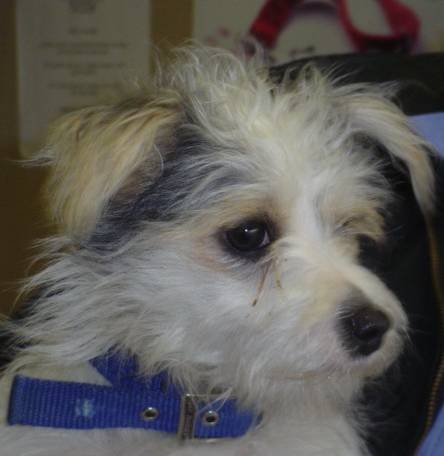

In [28]:
# Primeira Imagem
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 'dataset_teste/2297.jpg';
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

prediction = result[0][0] == 1 and 'Cachorro' or 'Gato'

Image(filename=img_path)

In [29]:
prediction

'Cachorro'